In [1]:
# install libraries
import influxdb_client
import pandas as pd
import secret
from sensor_data_functions import get_sensor_data
from weather_data_functions import get_current_weather, get_historical_weather
from irradiance_data_functions import irradiance_data
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import math
import pytz

In [8]:
lookback = '21h'
generation_df, consumption_df = get_sensor_data(lookback)
generation_df.head()

,power
datetime,
2023-12-21 00:33:50+00:00,0.083048
2023-12-21 00:33:51+00:00,0.081317
2023-12-21 00:33:52+00:00,0.082460
2023-12-21 00:33:53+00:00,0.083098
2023-12-21 00:33:54+00:00,0.081424


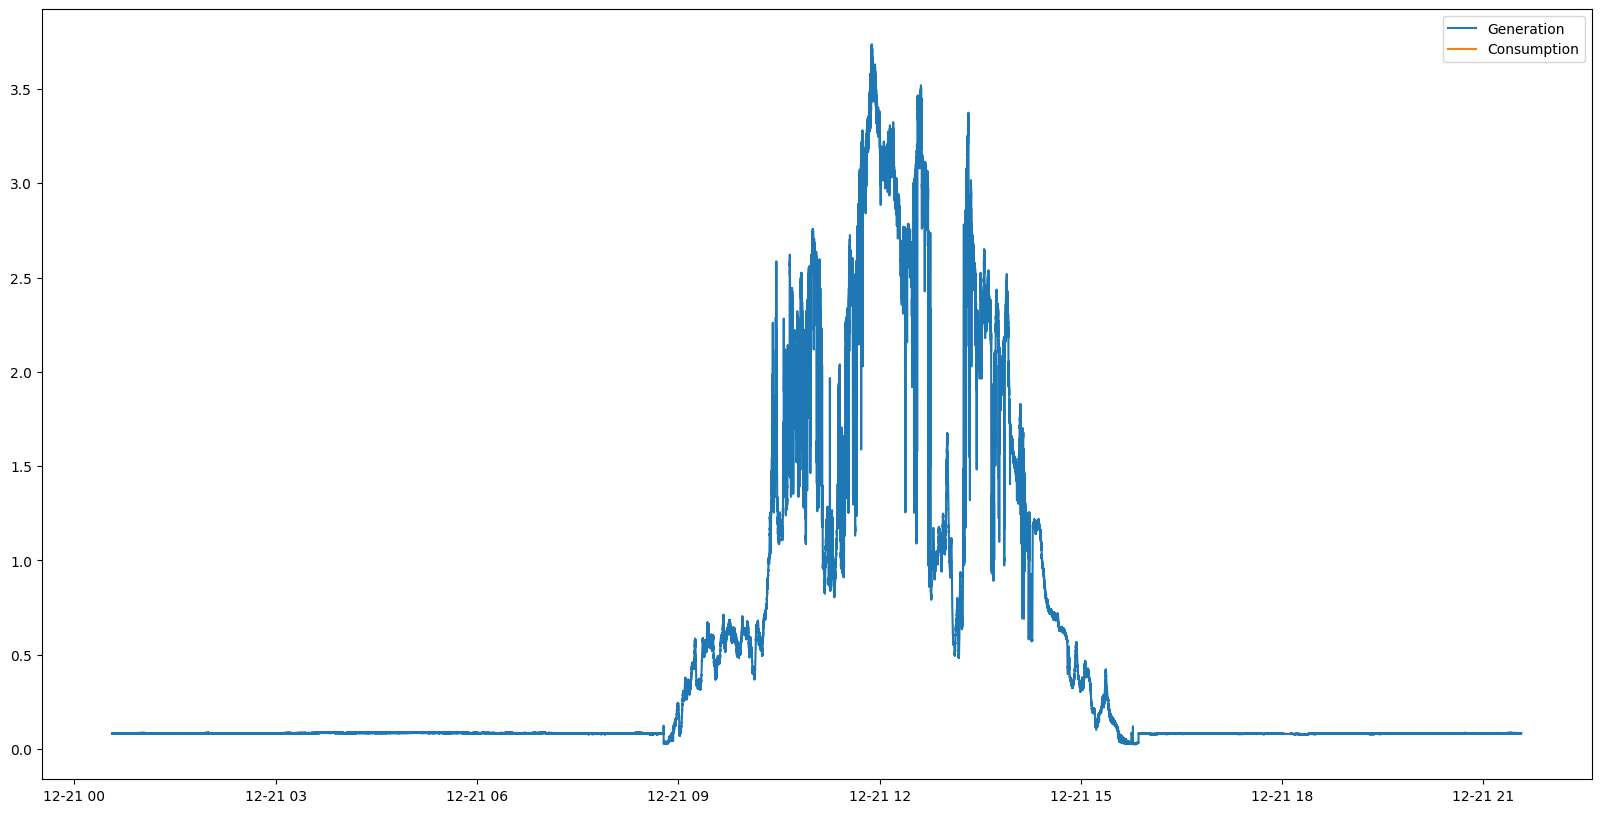

In [9]:
# plot both generation and consumption
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(generation_df.index, generation_df['power'], label='Generation')
ax.plot(consumption_df.index, consumption_df['power'], label='Consumption')
ax.legend()

In [4]:
postcode = 'WR7 4BU'
current_weather = get_current_weather(postcode)
current_weather

,last_updated_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,...,humidity,cloud,feelslike_c,feelslike_f,vis_km,vis_miles,uv,gust_mph,gust_kph,condition
last_updated,,,,,,,,,,,,,,,,,,,,,
2023-12-21 21:15,1703193300,11.0,51.8,0,16.1,25.9,300,WNW,1011.0,29.85,...,58,75,7.8,46.1,10.0,6.0,1.0,29.6,47.7,Partly cloudy


In [5]:
postcode = 'WR7 4BU'
date_time = datetime(year=2023, month=12, day=21)

weather = get_historical_weather(postcode, date_time)
weather.head()

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,uv,condition
time,,,,,,,,,,,,,,,,,,,,,
2023-12-21 00:00,1703116800,10.2,50.4,0,18.6,29.9,275,W,1013.0,29.91,...,0,45,0,0,10.0,6.0,27.9,44.9,1.0,Patchy rain possible
2023-12-21 01:00,1703120400,10.2,50.4,0,18.1,29.2,269,W,1012.0,29.88,...,0,45,0,0,10.0,6.0,27.6,44.5,1.0,Patchy rain possible
2023-12-21 02:00,1703124000,10.3,50.5,0,17.9,28.8,272,W,1011.0,29.86,...,0,45,0,0,10.0,6.0,27.0,43.5,1.0,Patchy rain possible
2023-12-21 03:00,1703127600,10.3,50.5,0,19.0,30.6,273,W,1011.0,29.86,...,0,45,0,0,10.0,6.0,28.5,45.8,1.0,Patchy rain possible
2023-12-21 04:00,1703131200,10.5,50.9,0,21.0,33.8,272,W,1010.0,29.83,...,0,0,0,0,10.0,6.0,31.0,50.0,1.0,Overcast


In [7]:
postcode = 'WR7 4BU'
irradiance_data(postcode, date_time)

Locally available data used


,start,end,clear_sky,cloudy_sky,start_time
0,00:00,00:15,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-21 00:00:00
1,00:15,00:30,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-21 00:15:00
2,00:30,00:45,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-21 00:30:00
3,00:45,01:00,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-21 00:45:00
4,01:00,01:15,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-21 01:00:00
...,...,...,...,...,...
91,22:45,23:00,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-21 22:45:00
92,23:00,23:15,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-21 23:00:00
93,23:15,23:30,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-21 23:15:00
94,23:30,23:45,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-21 23:30:00


In [52]:
'''
code to get all the data for a certain day from influxdb
'''
# import libraries
import math

# determine the datetimes to query between
year = 2023
month = 12
day = 19
start_dt = datetime(year=year, month=month, day=day)
end_dt = start_dt + pd.Timedelta(days=1)

# work out the start and end lookback times from datetime
start_lookback = math.floor((pd.Timestamp.now() - start_dt).total_seconds() / 60 + 1)
end_lookback = math.ceil((pd.Timestamp.now() - end_dt).total_seconds() / 60 - 1)

bucket = "random"
org = "Empati Limited"
token = secret.influx_api_key
# Store the URL of your InfluxDB instance
url="https://eu-central-1-1.aws.cloud2.influxdata.com/"

# instantiate the client
client = influxdb_client.InfluxDBClient(
url=url,
token=token,
org=org
)

# instantiate the query client
query_api = client.query_api()

# query written in InfluxQL
query = f'from(bucket:"random")\
|> range(start: -{start_lookback}m, stop: -{end_lookback}m)\
|> filter(fn:(r) => r._measurement == "Power")\
|> filter(fn:(r) => r._field == "value")'

# submit the query
result = query_api.query(org=org, query=query)

# sort through the query and filter for OLD and NEW
old_results = []
new_results = []
for table in result:
    for record in table.records:
        if record.values['appliance'] == 'OLD':
            old_results.append((record.values['_time'], record.values['_value']))
        else:
            new_results.append((record.values['_time'], record.values['_value']))

# put the results into a dataframe and clean up
old_df = pd.DataFrame(old_results, columns=['time', 'power'])
new_df = pd.DataFrame(new_results, columns=['time', 'power'])

old_df['datetime'] = pd.to_datetime(old_df['time'])
old_df['power'] = pd.to_numeric(old_df['power'])
old_df = old_df.set_index('datetime')
old_df = old_df.drop(columns=['time'])

new_df['datetime'] = pd.to_datetime(new_df['time'])
new_df['power'] = pd.to_numeric(new_df['power'])
new_df = new_df.set_index('datetime')
new_df = new_df.drop(columns=['time'])

# make the start and end datetimes timezone aware
start_dt = pytz.utc.localize(start_dt)
end_dt = pytz.utc.localize(end_dt)
end_dt = end_dt - pd.Timedelta(seconds=1)

# filter the dataframes to the start and end datetimes
old_df = old_df[start_dt:end_dt]
new_df = new_df[start_dt:end_dt]

old_df

,power
datetime,
2023-12-19 00:00:00+00:00,0.083811
2023-12-19 00:00:01+00:00,0.084018
2023-12-19 00:00:02+00:00,0.082615
2023-12-19 00:00:03+00:00,0.084671
2023-12-19 00:00:04+00:00,0.082232
...,...
2023-12-19 23:59:55+00:00,0.084337
2023-12-19 23:59:56+00:00,0.083470
2023-12-19 23:59:57+00:00,0.085614


In [61]:
'''
A function to get a days worth of data from influxdb
'''
year = 2023
month = 12
day = 21
date_time = datetime(year=year, month=month, day=day)

def get_influx_data(date_time):

    # determine the datetimes to query between
    start_dt = date_time
    end_dt = start_dt + pd.Timedelta(days=1)

    # work out the start and end lookback times from datetime
    start_lookback = math.floor((pd.Timestamp.now() - start_dt).total_seconds() / 60 + 1)
    end_lookback = math.ceil((pd.Timestamp.now() - end_dt).total_seconds() / 60 - 1)

    bucket = "random"
    org = "Empati Limited"
    token = secret.influx_api_key
    # Store the URL of your InfluxDB instance
    url="https://eu-central-1-1.aws.cloud2.influxdata.com/"

    # instantiate the client
    client = influxdb_client.InfluxDBClient(
    url=url,
    token=token,
    org=org
    )

    # instantiate the query client
    query_api = client.query_api()

    # query written in InfluxQL
    query = f'from(bucket:"random")\
    |> range(start: -{start_lookback}m, stop: -{end_lookback}m)\
    |> filter(fn:(r) => r._measurement == "Power")\
    |> filter(fn:(r) => r._field == "value")'

    # submit the query
    result = query_api.query(org=org, query=query)

    # sort through the query and filter for OLD and NEW
    old_results = []
    new_results = []
    for table in result:
        for record in table.records:
            if record.values['appliance'] == 'OLD':
                old_results.append((record.values['_time'], record.values['_value']))
            else:
                new_results.append((record.values['_time'], record.values['_value']))

    # put the results into a dataframe and clean up
    old_df = pd.DataFrame(old_results, columns=['time', 'power'])
    new_df = pd.DataFrame(new_results, columns=['time', 'power'])

    old_df['datetime'] = pd.to_datetime(old_df['time'])
    old_df['power'] = pd.to_numeric(old_df['power'])
    old_df = old_df.set_index('datetime')
    old_df = old_df.drop(columns=['time'])

    new_df['datetime'] = pd.to_datetime(new_df['time'])
    new_df['power'] = pd.to_numeric(new_df['power'])
    new_df = new_df.set_index('datetime')
    new_df = new_df.drop(columns=['time'])

    # make the start and end datetimes timezone aware
    start_dt = pytz.utc.localize(start_dt)
    end_dt = pytz.utc.localize(end_dt)
    end_dt = end_dt - pd.Timedelta(seconds=1)

    # filter the dataframes to the start and end datetimes
    if len(old_df) > 0:
        old_df = old_df[start_dt:end_dt]
    if len(new_df) > 0:
        new_df = new_df[start_dt:end_dt]

    # determine the file locations for the dataframes
    consumption_location = "data/consumption/"
    generation_location = "data/generation/"

    # convert datetime to string for saving
    date_string = date_time.strftime('%Y-%m-%d')

    # save the dataframes to csv
    consumption_name = f"consumption_{date_string}.csv"
    generation_name = f"generation_{date_string}.csv"
    old_df.to_csv(generation_location + generation_name)
    new_df.to_csv(consumption_location + consumption_name)

    return old_df, new_df


In [62]:
year = 2023
month = 12
day = 21
date_time = datetime(year=year, month=month, day=day)

old_df, new_df = get_influx_data(date_time)

old_df

,power
datetime,
2023-12-21 00:00:00+00:00,0.082161
2023-12-21 00:00:01+00:00,0.082723
2023-12-21 00:00:02+00:00,0.083293
2023-12-21 00:00:03+00:00,0.083122
2023-12-21 00:00:04+00:00,0.082661
...,...
2023-12-21 23:59:55+00:00,0.087366
2023-12-21 23:59:56+00:00,0.084869
2023-12-21 23:59:57+00:00,0.087458


In [64]:
'''
A function to get a days worth of sensor data from local storage or influxdb
'''

def get_sensor_data(date_time):
    
        # determine the datetimes to query between
        start_dt = date_time
        end_dt = start_dt + pd.Timedelta(days=1)
    
        # work out the start and end lookback times from datetime
        start_lookback = math.floor((pd.Timestamp.now() - start_dt).total_seconds() / 60 + 1)
        end_lookback = math.ceil((pd.Timestamp.now() - end_dt).total_seconds() / 60 - 1)
    
        # determine the file locations for the dataframes
        consumption_location = "data/consumption/"
        generation_location = "data/generation/"
    
        # convert datetime to string for saving
        date_string = date_time.strftime('%Y-%m-%d')
    
        # determine the file names
        consumption_name = f"consumption_{date_string}.csv"
        generation_name = f"generation_{date_string}.csv"
    
        # try to load the dataframes from local storage
        try:
            consumption_df = pd.read_csv(consumption_location + consumption_name)
            generation_df = pd.read_csv(generation_location + generation_name)
            consumption_df['datetime'] = pd.to_datetime(consumption_df['datetime'])
            consumption_df = consumption_df.set_index('datetime')
            generation_df['datetime'] = pd.to_datetime(generation_df['datetime'])
            generation_df = generation_df.set_index('datetime')
            print('Data loaded from local storage')
        except:
            # if the dataframes don't exist then query influxdb
            print('Data not found in local storage, querying influxdb')
            generation_df, consumption_df = get_influx_data(date_time)
    
        return generation_df, consumption_df

In [65]:
year = 2023
month = 12
day = 21
date_time = datetime(year=year, month=month, day=day)

old_df, new_df = get_sensor_data(date_time)

old_df

Data loaded from local storage


,power
datetime,
2023-12-21 00:00:00+00:00,0.082161
2023-12-21 00:00:01+00:00,0.082723
2023-12-21 00:00:02+00:00,0.083293
2023-12-21 00:00:03+00:00,0.083122
2023-12-21 00:00:04+00:00,0.082661
...,...
2023-12-21 23:59:55+00:00,0.087366
2023-12-21 23:59:56+00:00,0.084869
2023-12-21 23:59:57+00:00,0.087458
